# Задача кластерного анализа

> В таблице «Монетки.ods» содержатся координаты x и y точек некоторого изображения (давайте
считать, что это обработанное фото трёх монеток с зашумлением). Примените к данным вашего
варианта метод k-средних, перебирая число кластеров k = 2, 3, 4. Для каждого k изобразите
полученное разбиение на графике, выделяя кластеры разными цветами. По графикам оцените,
насколько удалось распознать образы монеток. Повторите опыт несколько раз, выбирая разные
начальные значения для центров кластеров (можно назначать их случайно)



У нас тут слишком много данных чтобы их вводить руками, аж $371$ рядов.
И даже если это всё переписать, все равно будет в получившемся `.pdf`-е целая страница рандомных чисел, а это очень не красиво и никому не нужно.
Я решил сконвертировать `.ods` файл в `.csv` и потом считать его `pandas`-ом.
Считать напрямую `.ods` файл у меня не получилось.
`pandas` вроде умеет читать только `.xlsx` и `.csv`.

In [7]:
import pandas as pd

data = pd.read_csv("Монетки.csv")
data = data[['x4','y4']] # у меня 4ый вариант и поэтому надо взять эти две колонки 

Сначала надо нарисовать эту картинку, чтобы убедиться что это реально три монетки. 

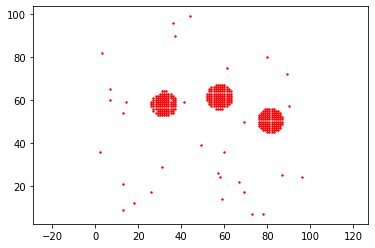

In [8]:
import matplotlib.pyplot as plt

plt.scatter(data['x4'], data['y4'], c='red', s=2)
plt.axis('equal')
plt.show()

Как можно заметить, на картинке действительно три монетки и некоторое количество помех.

## Как работает кластеризация

Этот алгоритм кластеризации называется $k$-means, потому что он использует $k$ разных средних и минимизарует сумарное расстояние$^2$.
В 2d случае, из-за теоремы Пифагора, среднеквадратическая ошибка (MSE) становится квадратом расстояния,
а среднее можно визуализировать как центр масс.

Алгоритм работает так:
1. Случайно выбираем $k$ точек — "центры" наших кластеров.
2. Для каждой точки $x_i$ из наших данных определяем к какому кластеру она относится. Точка пренадлежит к тому кластеру, центр которого ближе к ней, по сравнению со всеми другими центрами. Получившейся результат визуально чем-то похож на диаграмму Вороного: плоскость разбивается на $k$ регионов.
3. Находим среднию позицию каждого кластрера и делаем её новым центром.
4. Если на предидущем шаге что-то изменилось, переходим на второй шаг. 

## Обратно к коду

Теперь нужно переформатировать наши данные в список точек.

In [9]:
from sklearn.cluster import KMeans
import numpy as np

X = np.stack([data['x4'], data['y4']]).T

Так как нам надо будет строит кластеризованный график много раз, лучше обернуть его построение в функцию.

In [10]:
def plot(ax, n, rand=0):
    kmeans = KMeans(n_clusters=n, random_state=rand).fit(X)
    ax.scatter(data['x4'], data['y4'], c=kmeans.labels_, s=2)
    ax.set_title('k = '+str(n)) # подписываем график
    ax.axis('equal') # убераем растяжение

Нам нужно рисовать такие графики по 3 штуки: для k = 2, 3 и 4.

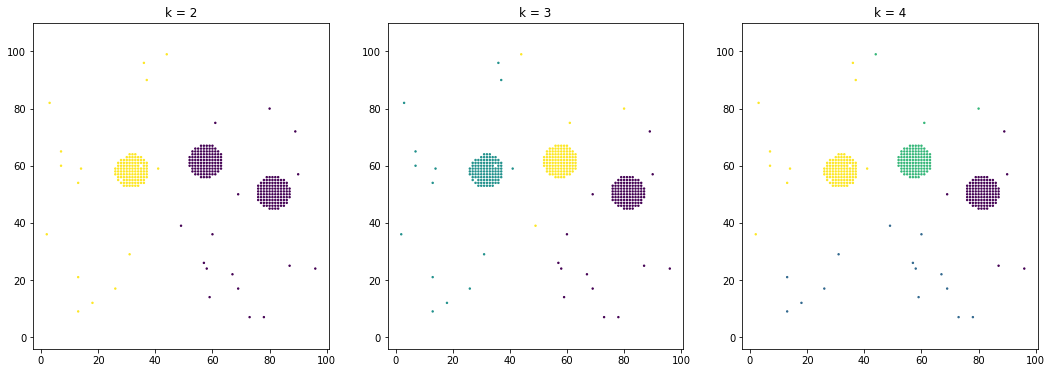

In [11]:
def triplePlot(rand):
    # subplots нужен чтобы графики строились в одни ряд горизонтально 
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18, 6))
    plot(ax1, 2, rand)
    plot(ax2, 3, rand)
    plot(ax3, 4, rand)
    plt.show()

triplePlot(0)

Для k = 3 всё распозналось идеально, для k = 4 вроде похоже на правду, но, если присмотреться, можно увидеть что он распознал нижние помехи как ещё одну монетку, а k = 2 совсем всё плохо.

Ещё нам надо построить несколько раз с другими рандомными значениями.

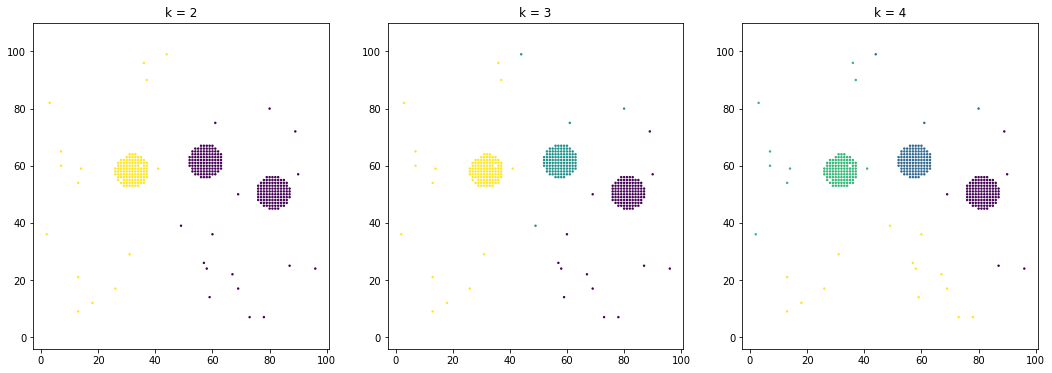

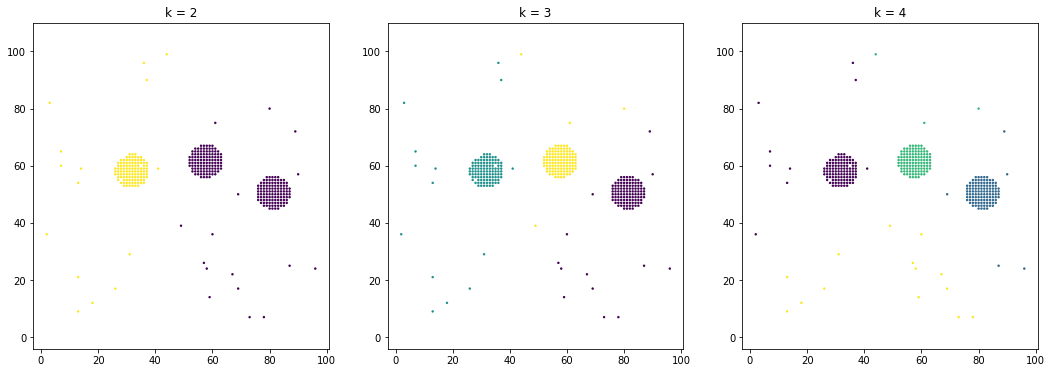

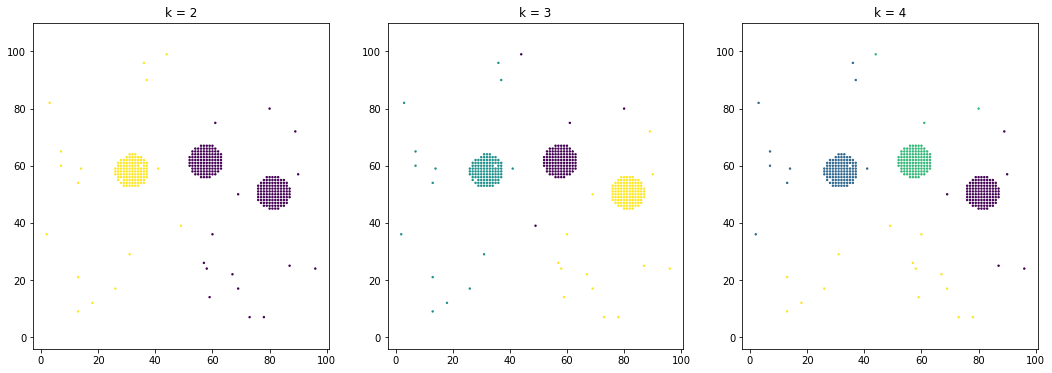

In [12]:
triplePlot(1)
triplePlot(2)
triplePlot(3)

Это поменяло только порядок кластеров.
Даже в k = 2 досихпор сгруперованны иммено две правые монетки, а не две левые.